In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

df = pd.read_csv("../datasets/music_gender.csv")
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


### Exploring data

In [9]:
df.shape

(66, 5)

In [12]:
X = df.drop('Gender', axis='columns')
y = df['Gender']
print(X.shape)
print(y.shape)

(66, 4)
(66,)


In [43]:
X = pd.get_dummies(X)
print(X.columns)
feature_names = X.columns
X.head()
X.shape

Index(['Favorite Color_Cool', 'Favorite Color_Neutral', 'Favorite Color_Warm',
       'Favorite Music Genre_Electronic',
       'Favorite Music Genre_Folk/Traditional', 'Favorite Music Genre_Hip hop',
       'Favorite Music Genre_Jazz/Blues', 'Favorite Music Genre_Pop',
       'Favorite Music Genre_R&B and soul', 'Favorite Music Genre_Rock',
       'Favorite Beverage_Beer', 'Favorite Beverage_Doesn't drink',
       'Favorite Beverage_Other', 'Favorite Beverage_Vodka',
       'Favorite Beverage_Whiskey', 'Favorite Beverage_Wine',
       'Favorite Soft Drink_7UP/Sprite', 'Favorite Soft Drink_Coca Cola/Pepsi',
       'Favorite Soft Drink_Fanta', 'Favorite Soft Drink_Other'],
      dtype='object')


(66, 20)

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                     stratify=y, random_state=2)

In [53]:
# Perform cross validation varying the depth of the tree. 

for d in range(2,12):
    tree = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  2 Accuracy: 0.6911111111111111
Depth:  3 Accuracy: 0.631111111111111
Depth:  4 Accuracy: 0.5466666666666666
Depth:  5 Accuracy: 0.5066666666666666
Depth:  6 Accuracy: 0.5666666666666667
Depth:  7 Accuracy: 0.5266666666666666
Depth:  8 Accuracy: 0.4666666666666667
Depth:  9 Accuracy: 0.48888888888888893
Depth:  10 Accuracy: 0.528888888888889
Depth:  11 Accuracy: 0.4866666666666667


##### * These are the train accuracy. It varies from 0.487 to 0.691

In [35]:
tree = DecisionTreeClassifier(max_depth=4)
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_hat = tree.predict(X_test)
print("Test Accuracy: ", tree.score(X_test, y_test))

Test Accuracy:  0.5882352941176471


### Confusion matrix

In [36]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[6 3]
 [4 4]]

TN 6 FP 3 FN 4 TP 4


** These are not correctly classified. That is why, our accuracy was so badly performed.

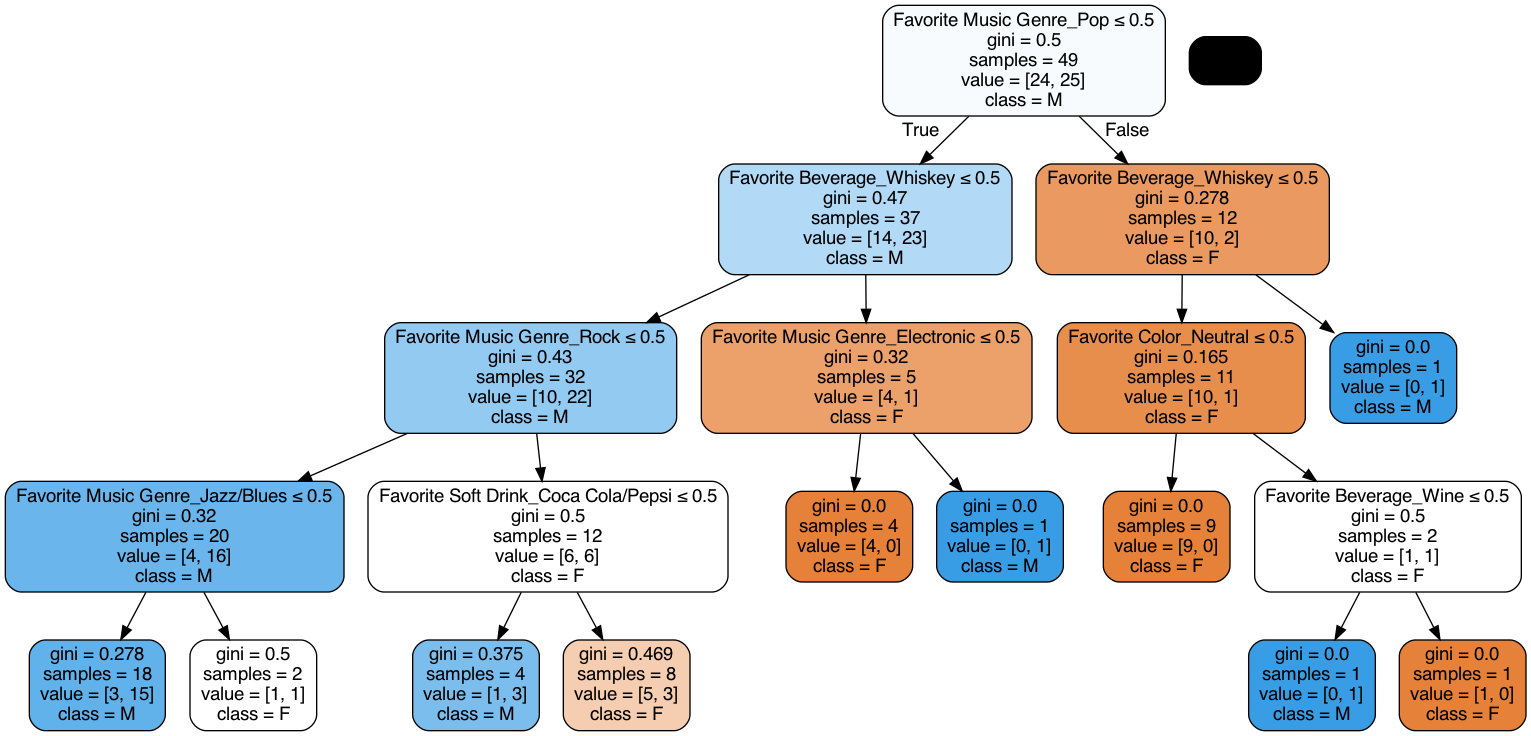

In [41]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
               special_characters=True, class_names=['F','M'],feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../plots/DecisionTree_gender.png')
Image(graph.create_png())